## 引入套件

In [1]:
# 引入所需套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

##  讀取資料與確認資料型態

In [2]:
# 使用 pandas 中的 read_csv 來讀取 csv 檔案
title = pd.read_csv('titles.csv')
credit = pd.read_csv('credits.csv')

In [3]:
# .head() 可以只顯示表格前五筆資料，非常適合在龐大資料裡面檢查有哪些資料欄位及型態
title.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [4]:
# 確認資料集中每個欄位的資料型態
# object = 物件; int64 = 整數; float64 = 浮點數
title.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [5]:
# 檢查資料集中有哪些欄位具有空值
title.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

## 空值處理

- 方法一：補值

In [6]:
# 使用「字典」的資料結構進行補值，並以 0 作為補值方式
values = {"seasons": 0}
# inplace 代表補值後原始的資料表格會進行更動
title.fillna(value = values, inplace = True)
title.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],0.0,tt0070047,8.1,391942.0,95.337,7.7


In [7]:
title.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

- 方法二：刪除空值

In [8]:
# 我們針對 imdb_score, imdb_votes 進行刪除空值的處理
title.dropna(subset = ['imdb_score', 'imdb_votes'], inplace = True)
title.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],0.0,tt0070047,8.1,391942.0,95.337,7.7
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3


In [9]:
# 全部的空值處理完之後，每個資料欄位的空值剩餘數量
title.isna().sum()

id                         0
title                      0
type                       0
description                4
release_year               0
age_certification       2278
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity           82
tmdb_score               226
dtype: int64

## 得到影視分級類別的產量

- 方法一：使用 pandas 中的 groupby

In [10]:
# 針對影視分級的資料欄位 age_certification 進行 groupby
# .size() 代表的意思為「計數」
# .sort_values() 的用途為將資料進行排序，預設為「升冪排序」
title.groupby(['age_certification']).size().sort_values(ascending = False)

age_certification
TV-MA    792
R        546
TV-14    436
PG-13    418
PG       237
TV-PG    172
G        105
TV-Y7    104
TV-Y      94
TV-G      72
NC-17     13
dtype: int64

- 方法二：使用 pandas 中的 pivot_table

In [11]:
# 使用 pandas 中的 pivot_table 進行分組，其概念類似於 Excel 中的樞紐分析！
# values 代表在乎的「值」; index 代表想要觀察的重點分組欄位; aggfunc 代表要以什麼函數套用在值上面，這邊使用 count 進行計數
title.pivot_table(values = 'id',
                 index = 'age_certification',
                 aggfunc = 'count').sort_values(by = 'id', ascending = False)

,id
age_certification,
TV-MA,792
R,546
TV-14,436
PG-13,418
PG,237
TV-PG,172
G,105
TV-Y7,104
TV-Y,94


## 製作各國影視作品總產量長條圖

In [12]:
# 觀察每個國家電影產量的數量
title['production_countries'].value_counts()

['US']                      1797
['IN']                       571
['JP']                       244
['GB']                       202
['KR']                       183
                            ... 
['IT', 'ES', 'FR']             1
['GB', 'US', 'CZ']             1
['BE', 'FR', 'US']             1
['IN', 'CN', 'US', 'GB']       1
['NG', 'CA']                   1
Name: production_countries, Length: 421, dtype: int64

In [13]:
# 將資料集的 index 重新排序
title = title.reset_index(drop = True)

# 引入套件，因為接下來要針對文字進行正規化處理
import re

# 進行文字正規化處理，目的為移除特殊符號
for i in range(0, len(title)):
    s = str(title.loc[i, 'production_countries'])
    out = re.sub(r'[^\w\s]','',s)
    title.loc[i, 'production_countries'] = out

<AxesSubplot:>

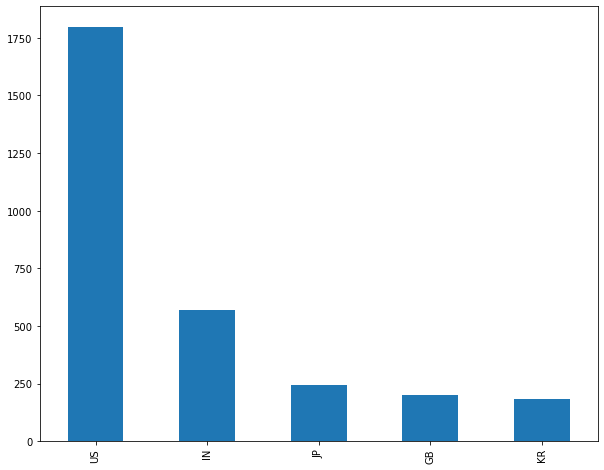

In [14]:
# 針對前五名產量高的國家進行長條圖的繪製，迅速看一下是哪些國家
title['production_countries'].value_counts().sort_values(ascending = False).head(5).plot.bar(figsize = (10, 8))

In [15]:
# 只保留以上五個國家
title_2 = title[title['production_countries'].isin(['US', 'IN', 'JP', 'GB', 'KR'])]
title_2 = title_2.reset_index(drop = True)
title_2

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",US,0.0,tt0075314,8.3,795222.0,27.612,8.2
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",GB,0.0,tt0071853,8.2,530877.0,18.216,7.8
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],GB,0.0,tt0079470,8.0,392419.0,17.505,7.8
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],US,0.0,tt0070047,8.1,391942.0,95.337,7.7
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",GB,4.0,tt0063929,8.8,72895.0,12.919,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,tm1146635,Daiki Tsuneta: Tokyo Chaotic,MOVIE,This documentary follows King Gnu frontman Dai...,2021,NaN,89,"['documentation', 'music']",JP,0.0,tt16781874,7.1,15.0,1.901,7.0
2993,tm1063339,Lee Su-geun: The Sense Coach,MOVIE,Lee Su-geun's rise to Korean comedy stardom we...,2021,NaN,45,['comedy'],KR,0.0,tt14880280,4.1,38.0,1.085,3.5
2994,ts273317,Pitta Kathalu,SHOW,"Four different women, four journeys of love an...",2021,TV-MA,37,"['drama', 'romance']",IN,1.0,tt13879000,5.1,727.0,1.400,5.5
2995,ts286386,The Big Day,SHOW,"For six engaged couples, happily ever after be...",2021,TV-MA,45,"['reality', 'romance']",US,2.0,tt13887518,4.6,327.0,1.400,6.0


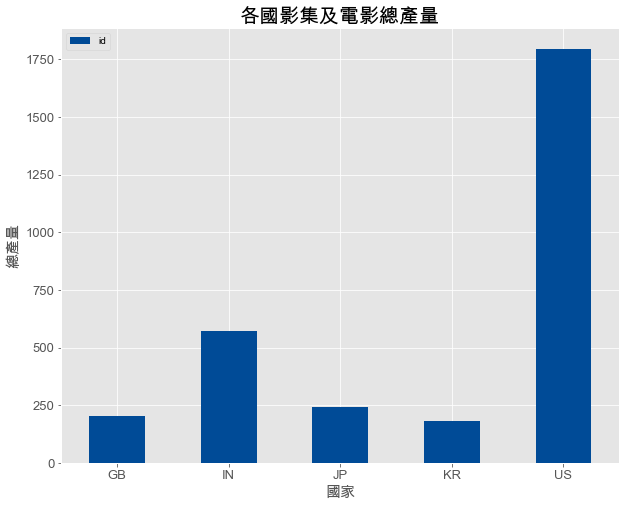

<Figure size 432x288 with 0 Axes>

In [16]:
# 顯示中文字體
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# 使用 ggplot 作為繪圖風格
plt.style.use('ggplot')


title_2.pivot_table(values = 'id',
                 index = 'production_countries',
                 aggfunc = lambda x: len(x.unique())).plot(color = '#004B97', kind = 'bar', legend = True, figsize = (10, 8))

# 設定標題
plt.title('各國影集及電影總產量', fontsize = 20)
# 設定 x 軸名稱及字體大小
plt.xlabel('國家', fontsize = 15)
# 設定 y 軸名稱及字體大小
plt.ylabel('總產量', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

# 儲存圖片
plt.savefig('movies.png')

## 製作 IMDB分數與票數散布圖

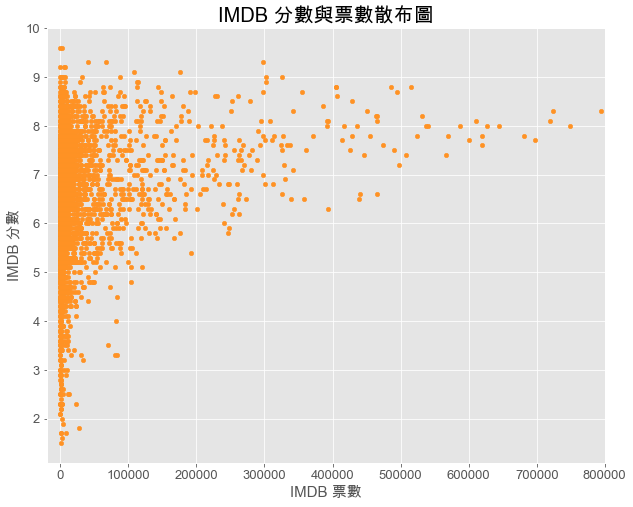

In [17]:
plt.style.use('ggplot')

title.plot(kind = 'scatter', x = 'imdb_votes', y = 'imdb_score', figsize = (10, 8), color = '#FF9224')
plt.title('IMDB 分數與票數散布圖', fontsize = 20)
plt.xlabel('IMDB 票數', fontsize = 15)
plt.ylabel('IMDB 分數', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# 設定圖軸範圍
plt.xlim(-20000, 800000)

# 去除科學符號
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

# 儲存圖片
#plt.savefig('score.png')

## 製作 IMDB分數與放映長度關係與分布

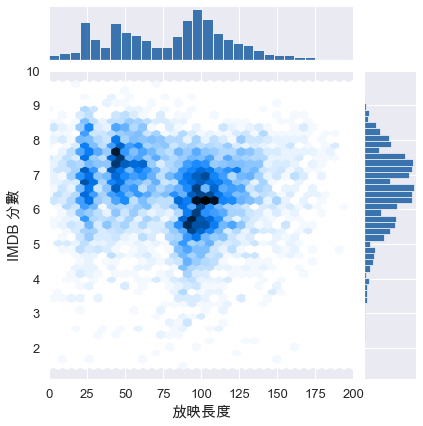

<Figure size 1440x720 with 0 Axes>

In [18]:
# seaborn 的參數設定
sns.set(rc = {'figure.figsize':(20,10),
             'font.sans-serif': 'Arial Unicode MS',
             'axes.unicode_minus': False})

sns.jointplot(x = 'runtime', y = 'imdb_score', data = title, kind = 'hex', color = '#004B97')
plt.xlabel('放映長度', fontsize = 15)
plt.ylabel('IMDB 分數', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
# 設定圖軸範圍
plt.xlim(0, 200)

plt.show()

# 儲存圖片
plt.savefig('runtime.png')